In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("Relâmpago Marquin_posner_2024-11-08_14h53.46.775.csv")
data = data[["is_valid", "corr", "resp.corr", "resp.rt"]]
data.head(3)

,is_valid,corr,resp.corr,resp.rt
0,NaN,NaN,NaN,NaN
1,0.0,left,1.0,0.312276
2,1.0,left,1.0,0.211612


In [11]:
summary = data.groupby(["is_valid"])["resp.rt"].mean()
# Transforma em DataFrame para facilitar a filtragem
summary_df = summary.reset_index()
summary_df

,is_valid,resp.rt
0,-1.0,0.286154
1,0.0,0.276868
2,1.0,0.239247


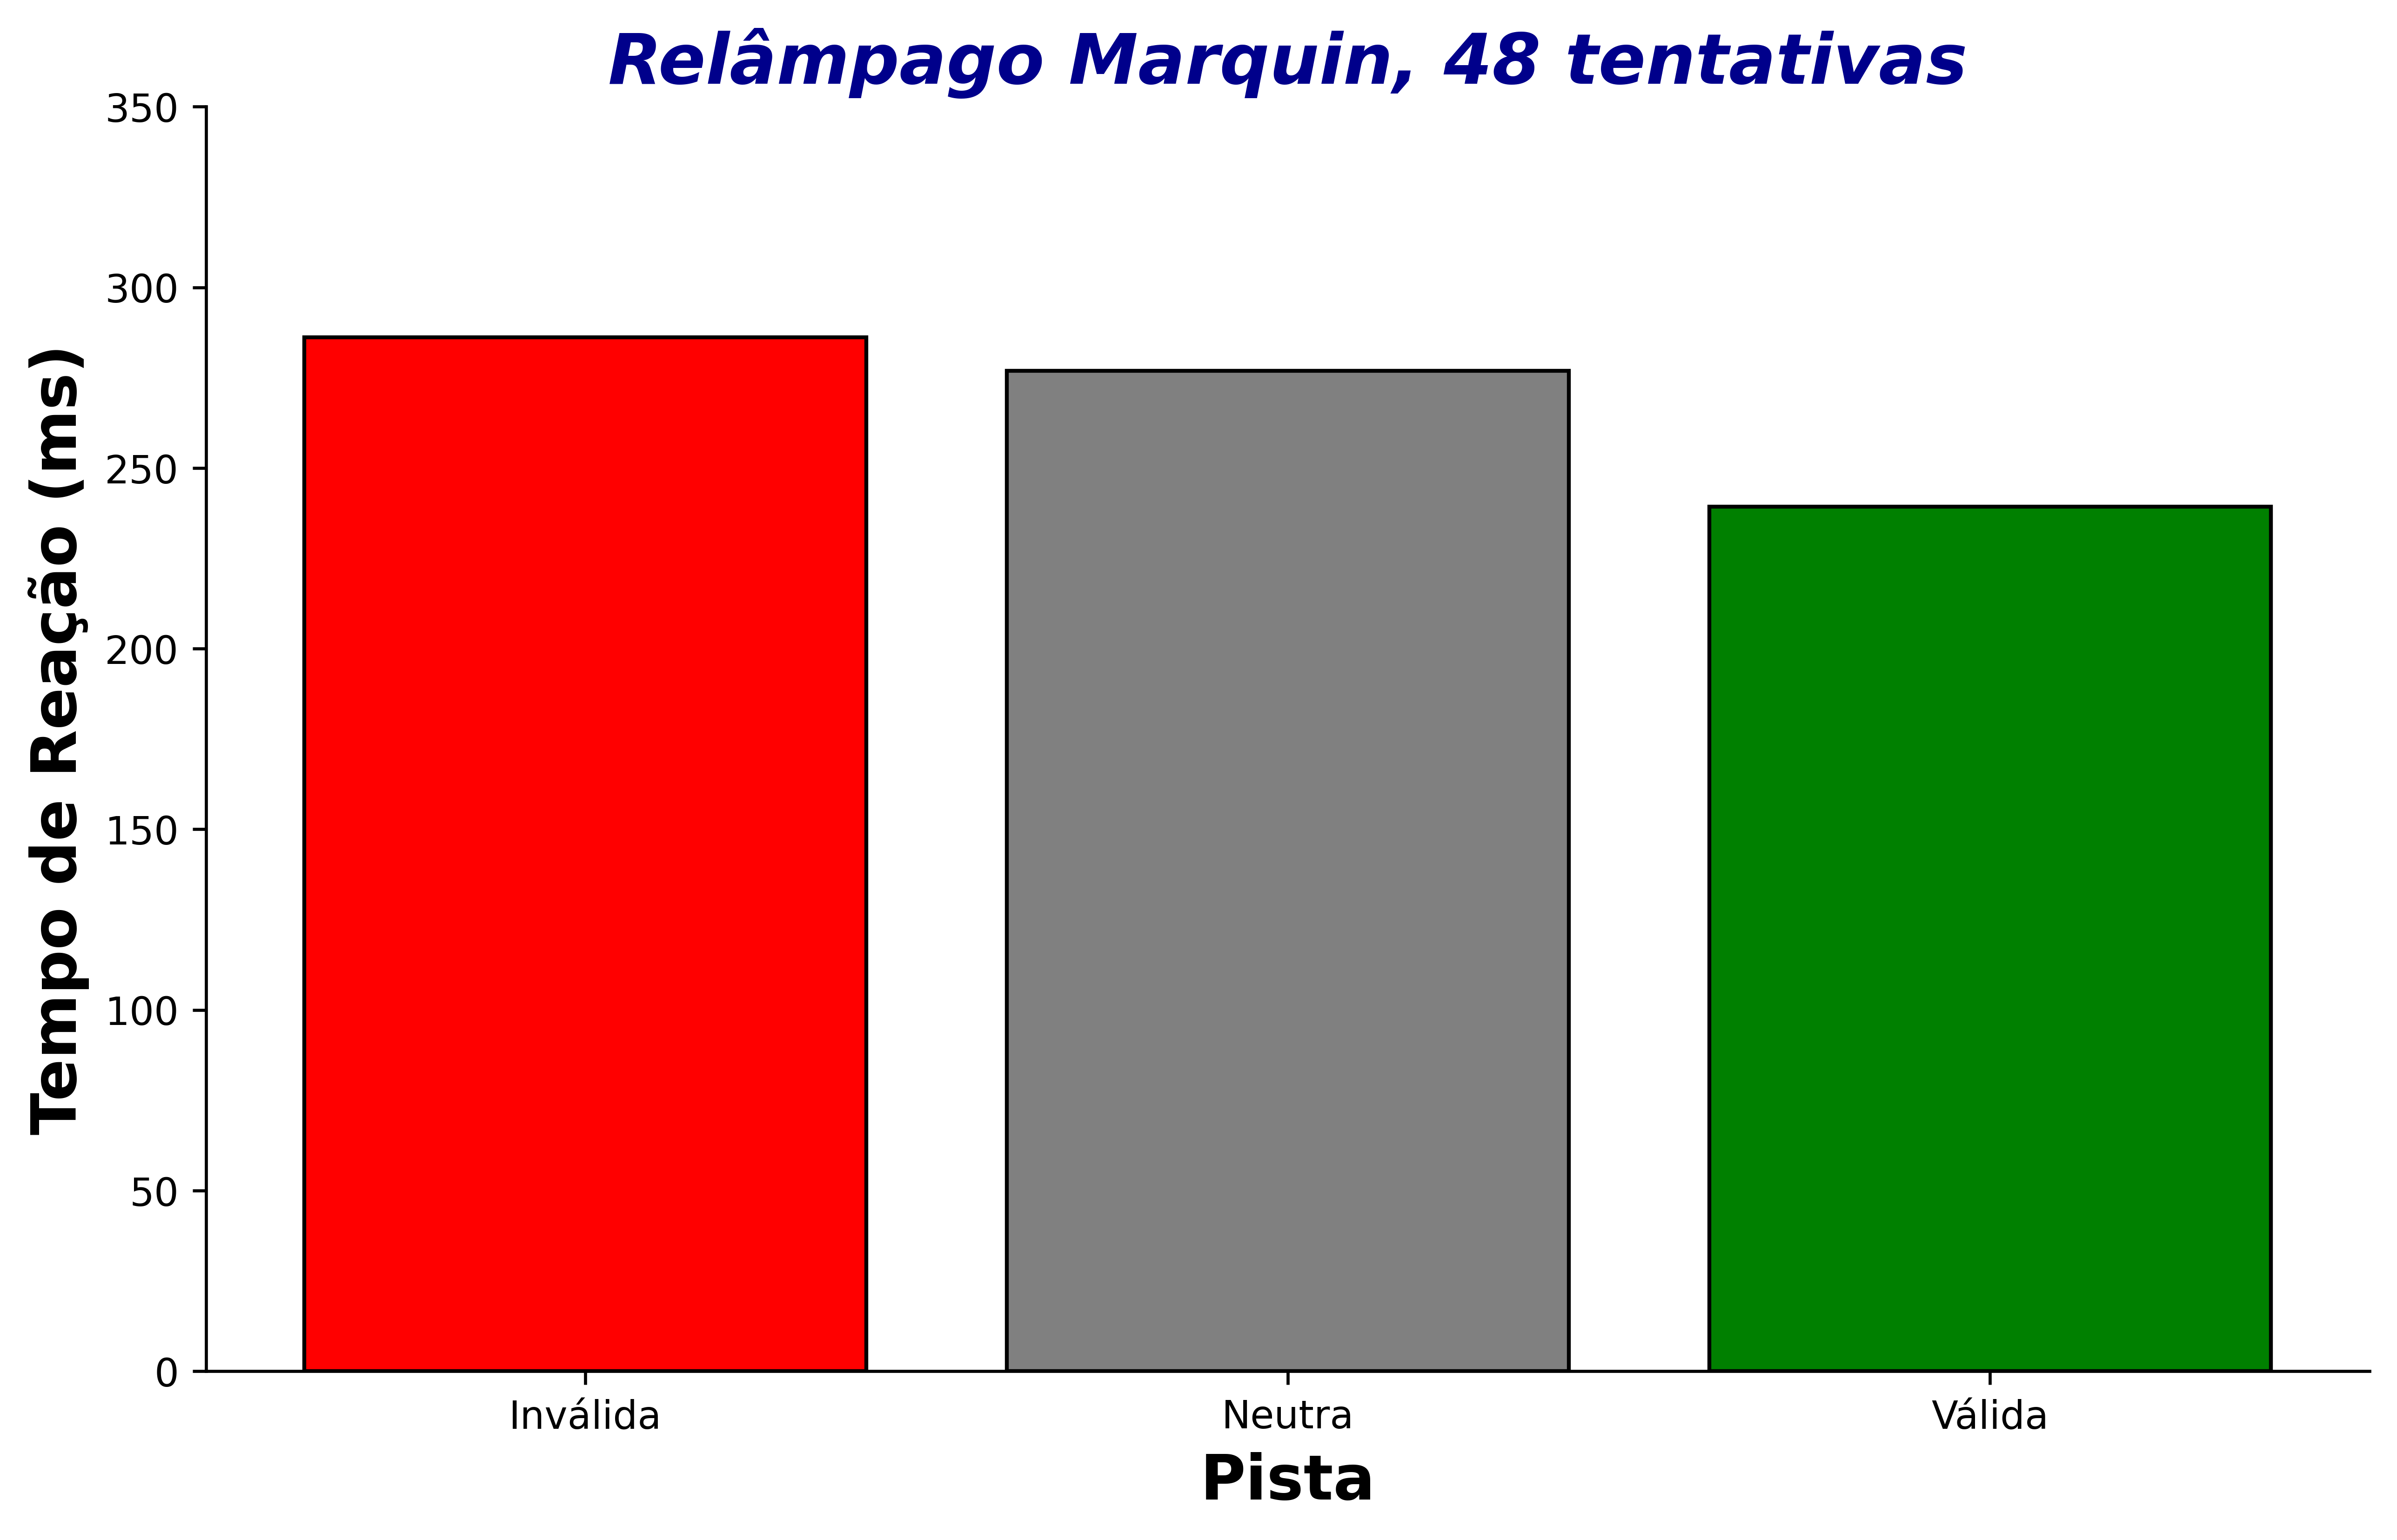

In [18]:
# Define as labels correspondentes
labels = {-1: "Inválida", 0: "Neutra", 1: "Válida"}

# Define as cores para cada barra
colors = ["red", "gray", "green"]

# Substitui o gráfico scatter pelo gráfico de barras
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=600)
ax.bar(
    [labels[val] for val in summary_df["is_valid"]],  # Usa as labels definidas
    summary_df["resp.rt"] * 1000,                     # Converte resp.rt para milissegundos
    color = colors,                                      # Aplica as cores às barras
    edgecolor = "black"
    )

# Configurações de rótulos e eixos
ax.set_xlabel("Pista", fontweight="bold", fontsize=16, color="black")
ax.set_ylabel("Tempo de Reação (ms)", fontweight="bold", fontsize=16, color="black")
ax.set_title("Relâmpago Marquin, 48 tentativas", fontweight = "bold",
            fontstyle = "italic", fontsize = 18, color = "darkblue")
ax.set_ylim(0, 350)
ax.spines["top"].set_color(None)
ax.spines["right"].set_color(None)

plt.savefig("Figura 1.jpg", dpi = 600)

plt.show()

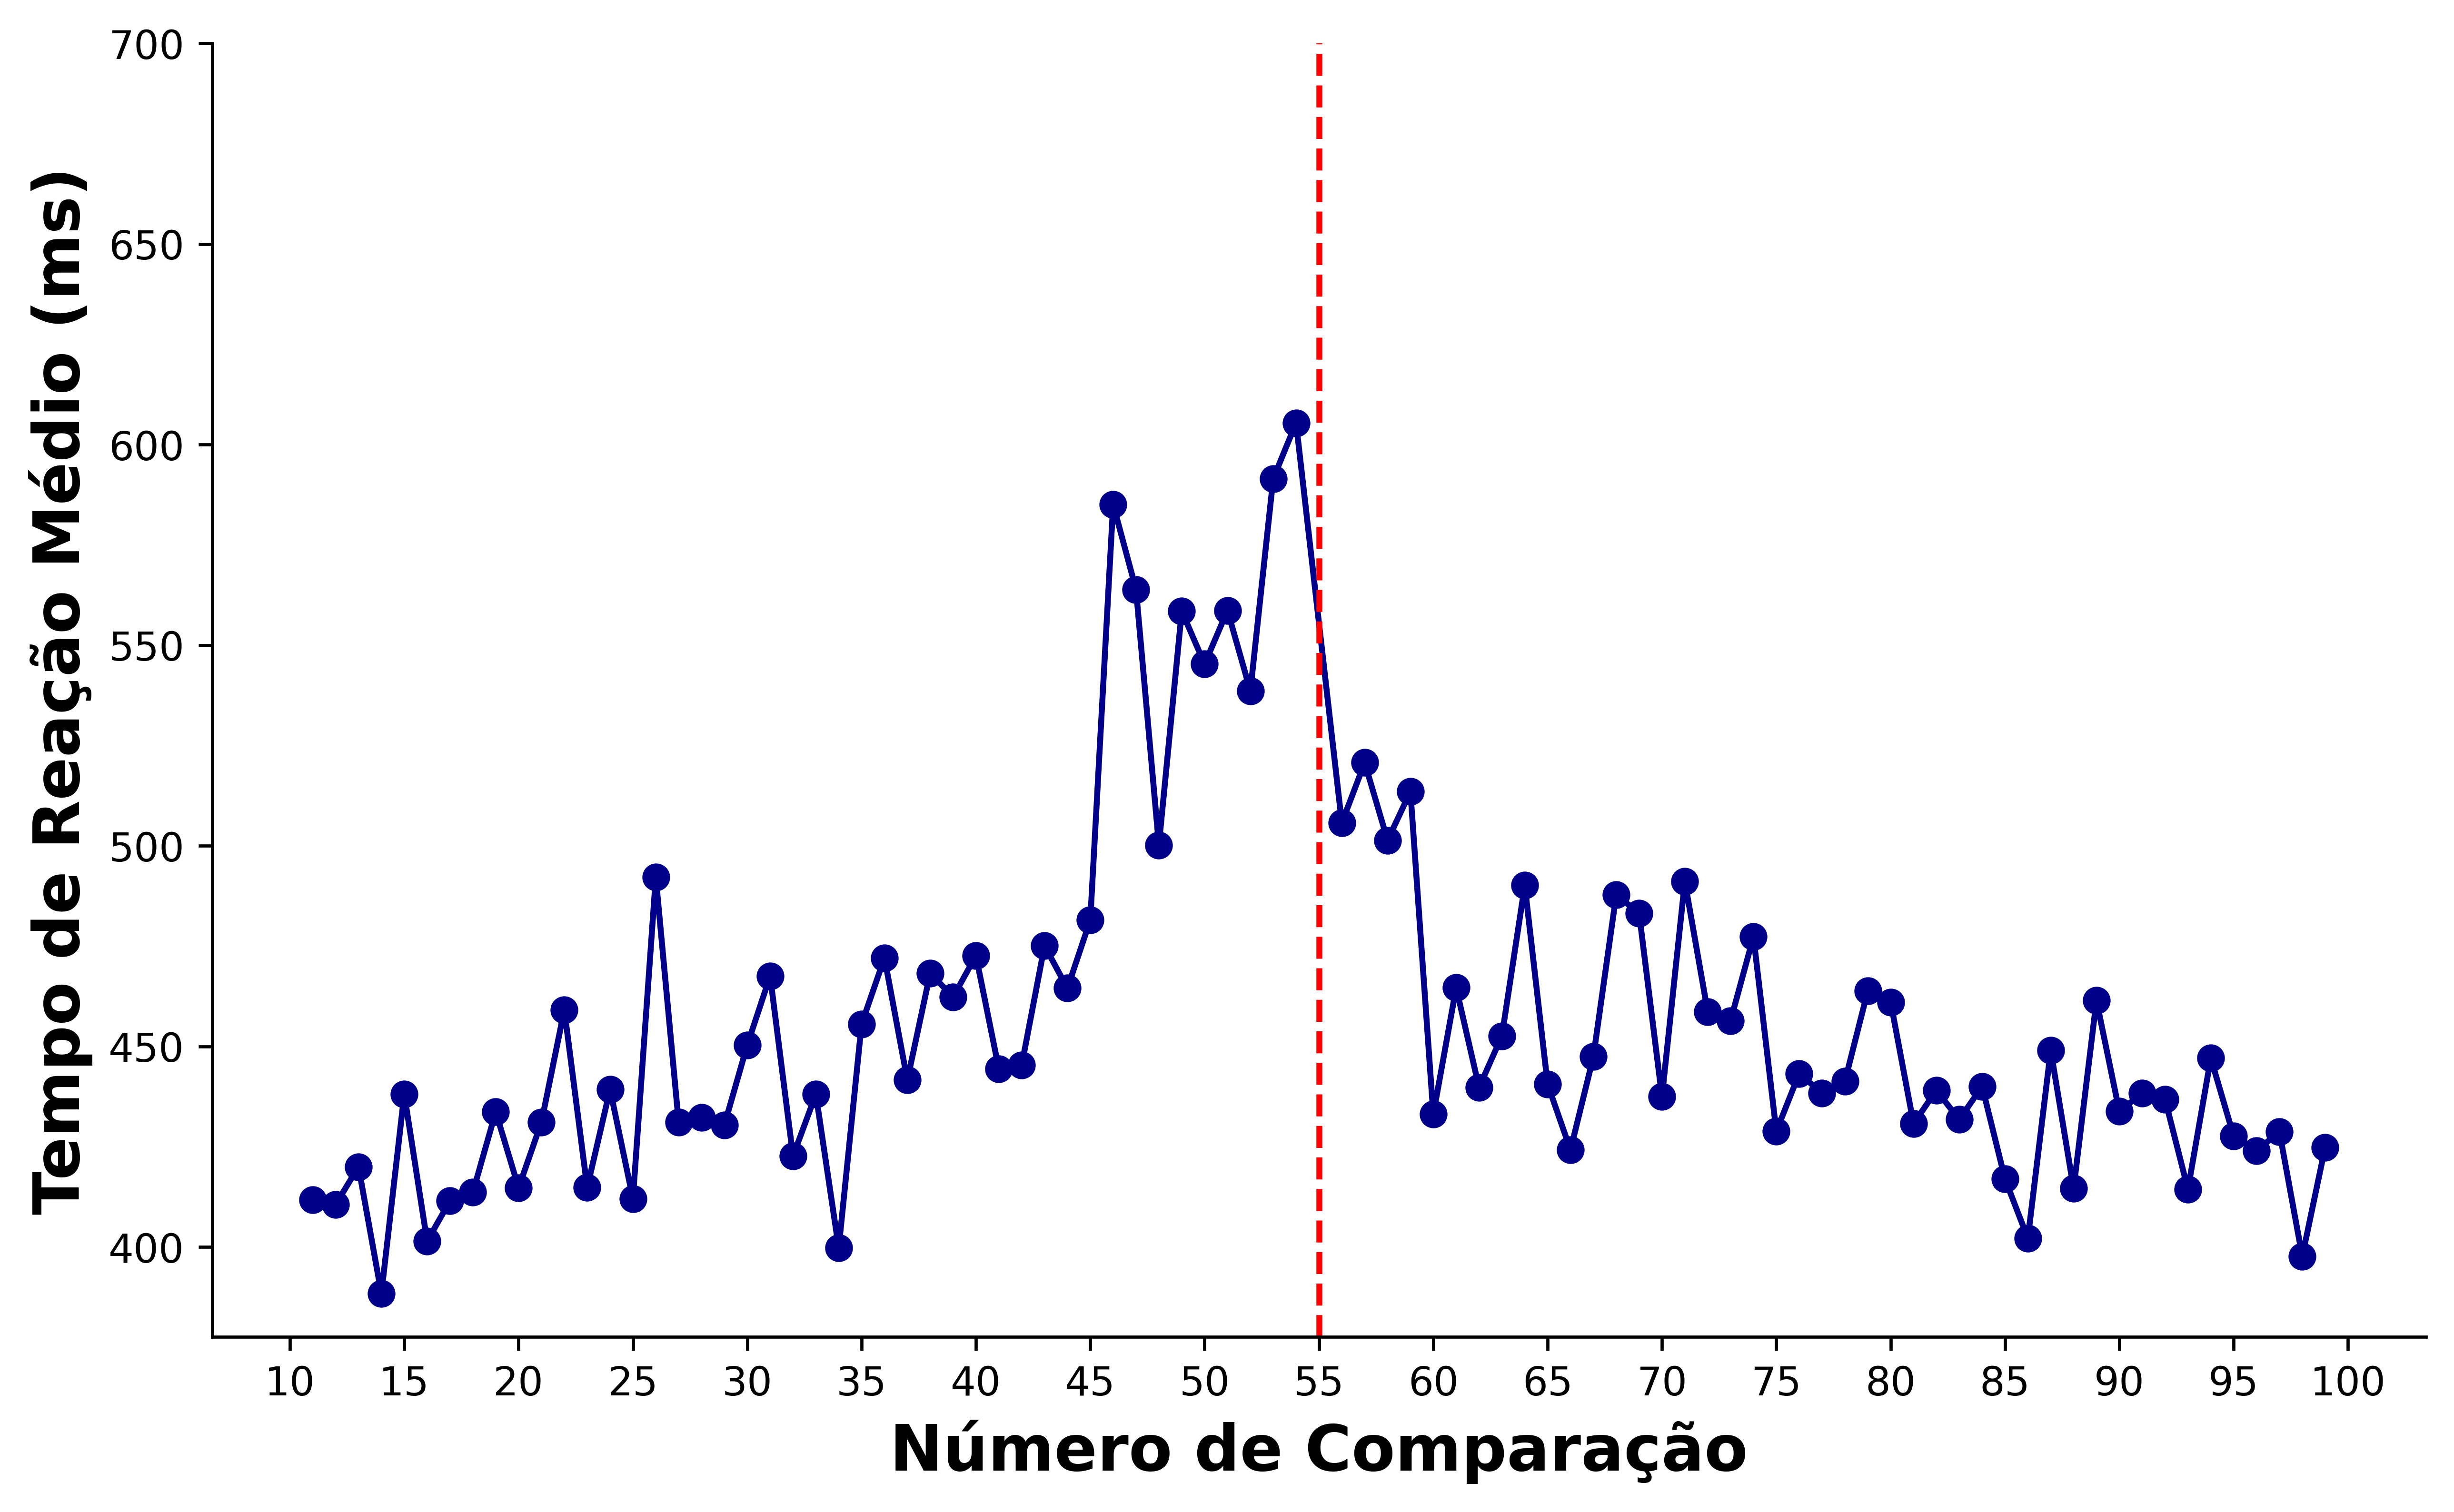

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6), dpi = 600)

ax.plot(summary_df["target_number"], summary_df["key_resp.rt"] * 1000,
        color = "darkblue", marker = "o")


ax.set_title("O Número de Comparação é Menor ou Maior Que 55?",
            fontsize = 18, fontweight = "bold", fontstyle = "italic", color = "darkblue")

ax.set_xlabel("Número de Comparação", fontweight = "bold", fontsize = 16, color = "black")
ax.set_ylabel("Tempo de Reação Médio (ms)", fontweight = "bold", fontsize = 16, color = "black")

ax.set_xticks(list(range(10, 105, 5)))
ax.set_xticklabels(list(range(10, 105, 5)), fontsize = 10)

ax.set_yticks(list(range(400, 750, 50)))
ax.set_yticklabels(list(range(400, 750, 50)), fontsize = 10)

ax.axvline(ymin = 0, ymax = 750, x = 55, ls = "--", color = "red")

ax.spines["top"].set_color(None)
ax.spines["right"].set_color(None)

plt.savefig("Figura 2.jpg", dpi = 600)
plt.show()

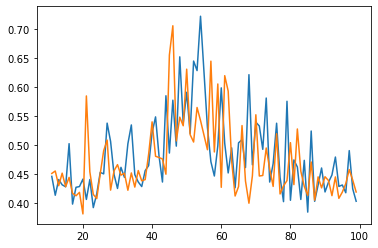

In [43]:
plt.plot(summary_LL["target_number"], summary_LL["key_resp.rt"])
plt.plot(summary_RL["target_number"], summary_RL["key_resp.rt"])
plt.show()

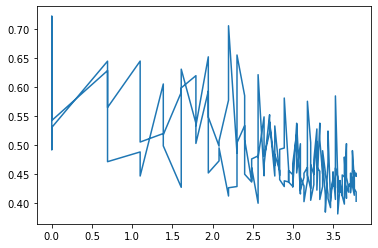

[[ 1.         -0.60590615]
 [-0.60590615  1.        ]]


In [50]:
summary_df["D"] = np.log(np.abs(55 - summary_df["target_number"]))

plt.plot(summary_df["D"], summary_df["key_resp.rt"])
plt.show()

print(np.corrcoef(summary_df["D"], summary_df["key_resp.rt"]))